 # Loading Part 2: Sizer Data

Welcome to Part 2 of our data loading series! This section builds upon the concepts and techniques introduced in Part 1. If you haven't gone through the first part, we highly recommend you do so to get a firm foundation. Here, we'll dive into handling 2-dimensional data, such as size distributions, which are common in fields like environmental science and engineering.

## Setting Up Your Working Path

Before we begin, let's set up the working path, which is the location on your computer where your data files are stored. In this example, we'll use data provided in the current directory of this notebook. However, you can easily change this to any directory where your data files are located. For instance, if you have a folder named "data" in your home directory for a project called "Campaign2023_of_awesome", you would set the path like this: 

`path = "U:\\data\\processing\\Campaign2023_of_awesome\\data"`

Let's start by importing the necessary Python libraries and modules. We'll explain each one as we use them throughout this notebook.

In [1]:
import os  # For handling file and directory paths
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting and visualizing data
# Particula package components
from particula.data import loader, loader_interface
from particula.data.loader_setting_builders import (
    SizerDataReaderBuilder,
    LoaderSizerSettingsBuilder,
    DataChecksBuilder,
)
# For accessing example data
from particula.data.tests.example_data.get_example_data import get_data_folder

Now, we'll determine the current working directory and set the path for the data folder. This step is essential for ensuring that our scripts know where to look for the data files.

In [2]:
# Retrieving and printing the current working directory of this script
current_path = os.getcwd()
print('Current path for this script:')
print(current_path.rsplit('particula')[-1])

# Setting and printing the path to the data folder
path = get_data_folder()
print('Path to data folder:')
print(path.rsplit('particula')[-1])

Current path for this script:
\docs\examples\streamlake\notebooks
Path to data folder:
\data\tests\example_data


## Load the Data

Now that we've set our working directory, the next step is to load the data. We'll be using the `loader` module from the Particula package for this task. The function `loader.data_raw_loader()` is specifically designed to read data from a file, which we'll specify using its file path. This approach is straightforward and efficient for loading data into Python for analysis.



In [3]:
# Constructing the full file path for the data file
# We're joining the path set earlier with the specific file we want to load
data_file = os.path.join(
    path,  # The base path we set earlier
    'SMPS_data',  # The subdirectory where the data file is located
    '2022-07-07_095151_SMPS.csv')  # The name of the data file

# Optional: Print the file path to confirm it's correct
# print("Data file path:", data_file)

# Using the loader module to load the data from the file
# The data_raw_loader function takes the file path as its argument and
# reads the data
raw_data = loader.data_raw_loader(data_file)

# Printing a snippet of the loaded data for a quick preview
# This helps us to confirm that the data is loaded and to get an idea of
# its structure
print("Preview of loaded data:")
for row in raw_data[22:30]:  # Displaying rows 22 to 30 as a sample
    print(row)

Preview of loaded data:
Units,dW/dlogDp
Weight,Number
Sample #,Date,Start Time,Sample Temp (C),Sample Pressure (kPa),Relative Humidity (%),Mean Free Path (m),Gas Viscosity (Pa*s),Diameter Midpoint (nm),20.72,21.10,21.48,21.87,22.27,22.67,23.08,23.50,23.93,24.36,24.80,25.25,25.71,26.18,26.66,27.14,27.63,28.13,28.64,29.16,29.69,30.23,30.78,31.34,31.91,32.49,33.08,33.68,34.29,34.91,35.55,36.19,36.85,37.52,38.20,38.89,39.60,40.32,41.05,41.79,42.55,43.32,44.11,44.91,45.73,46.56,47.40,48.26,49.14,50.03,50.94,51.86,52.80,53.76,54.74,55.73,56.74,57.77,58.82,59.89,60.98,62.08,63.21,64.36,65.52,66.71,67.93,69.16,70.41,71.69,72.99,74.32,75.67,77.04,78.44,79.86,81.31,82.79,84.29,85.82,87.38,88.96,90.58,92.22,93.90,95.60,97.34,99.10,100.90,102.74,104.60,106.50,108.43,110.40,112.40,114.44,116.52,118.64,120.79,122.98,125.21,127.49,129.80,132.16,134.56,137.00,139.49,142.02,144.60,147.22,149.89,152.61,155.38,158.20,161.08,164.00,166.98,170.01,173.09,176.24,179.43,182.69,186.01,189.38,192.82,196.32,199.

# Formatting the Data

When dealing with 2-dimensional data, such as size distributions, the formatting process can be a bit more complex compared to 1-dimensional data. For our data, we need to extract size bins and use them as headers for our dataset. This involves specifying the start and end points within the data that define our size bins. In our specific example, the start point is indicated by the keyword "Date Time" and the end point by "Total Conc". Understanding where your data starts and ends is crucial for accurate formatting and analysis.

In [4]:
# Formatting the data for time series analysis
# The sizer_data_formatter function from the loader module is used for
# this purpose

data_checks = (
    DataChecksBuilder()
    .set_characters([250])
    .set_skip_rows(25)
    .set_char_counts({"/": 2, ":": 2})
    .build()
)
data_sizer_reader = (
    SizerDataReaderBuilder()
    .set_sizer_start_keyword("20.72")
    .set_sizer_end_keyword("784.39")
    .set_sizer_concentration_convert_from("dw/dlogdp")
    .build()
)

epoch_time, data, header = loader.sizer_data_formatter(
    data=raw_data,  # The raw data that was loaded earlier
    data_checks=data_checks,
    data_sizer_reader=data_sizer_reader,
    time_column=[1, 2],  # Columns that contain the time data
    time_format="%m/%d/%Y %H:%M:%S",  # Format of the time data
    delimiter=",",  # Delimiter used in the data file
    header_row=24)  # Row number that contains the header

# Printing a preview of the formatted data to confirm successful formatting
print('Epoch time (First 5 Entries):')
print(epoch_time[:5])  # Displaying the first 5 time entries
print('Data shape:')
print(data.shape)  # Showing the shape of the data array
print('Header (First 10 Entries):')
print(header[:10])  # Displaying the first 10 headers

Epoch time (First 5 Entries):
[1.65718376e+09 1.65718385e+09 1.65718394e+09 1.65718403e+09
 1.65718412e+09]
Data shape:
(2854, 203)
Header (First 10 Entries):
['20.72', '21.10', '21.48', '21.87', '22.27', '22.67', '23.08', '23.50', '23.93', '24.36']


## Pause to Plot

Visualizing your data is a crucial step in the data analysis process. It allows you to see patterns, trends, and potential anomalies that might not be evident from the raw data alone. Now that we have formatted the data and extracted the time information, let's create a plot. This will help us get a visual sense of the data's characteristics, such as the concentration of particles in different size bins over time.


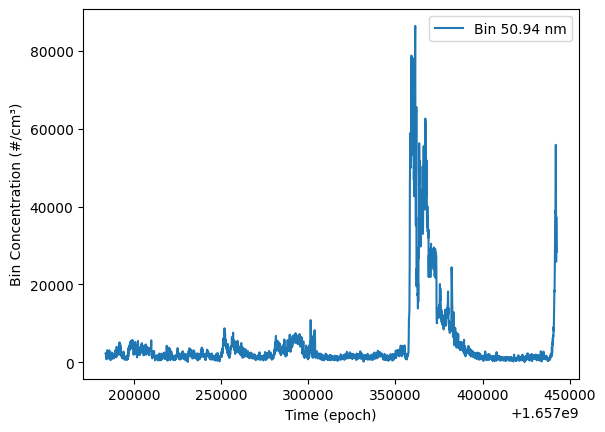

In [5]:
# Creating a plot using matplotlib
fig, ax = plt.subplots()  # Creating a figure and axis for the plot

# Plotting data from a specific size bin against time
# 'epoch_time' is used on the x-axis (time data)
# 'data[:, 50]' selects the data from the 50th bin (as an example) for the y-axis
ax.plot(epoch_time,
        data[:, 50],  # Selecting the 50th bin of data to plot
        label=f'Bin {header[50]} nm',  # Adding a label with the bin size
        )

# Setting labels for the x-axis and y-axis
ax.set_xlabel("Time (epoch)")  # Label for the x-axis
ax.set_ylabel("Bin Concentration (#/cm³)")  # Label for the y-axis

# Adding a legend to the plot for clarity
ax.legend()

# Displaying the plot
plt.show()

# Adjusting the layout to ensure all plot elements are visible and
# well-arranged
fig.tight_layout()

## Dates in Plots

When working with time-series data, it's often helpful to have dates on the x-axis of your plots for better readability and understanding. However, to display dates effectively in plots using `matplotlib`, we need to convert our time data into a format that `matplotlib` can recognize and work with.

One common format for this purpose is `np.datetime64`. This format represents dates and times in a way that is compatible with numpy arrays, making it ideal for plotting time-related data. In our case, we can convert our epoch time (time since a fixed point in the past, typically January 1, 1970) to `np.datetime64` using the `convert.datetime64_from_epoch_array` function from the Particula package.

Additionally, to make the plot more readable, especially when there are many data points, it's a good practice to rotate the x-axis labels. This prevents overlapping and makes each date and time label clear. We can achieve this rotation using `plt.xticks(rotation=45)`.

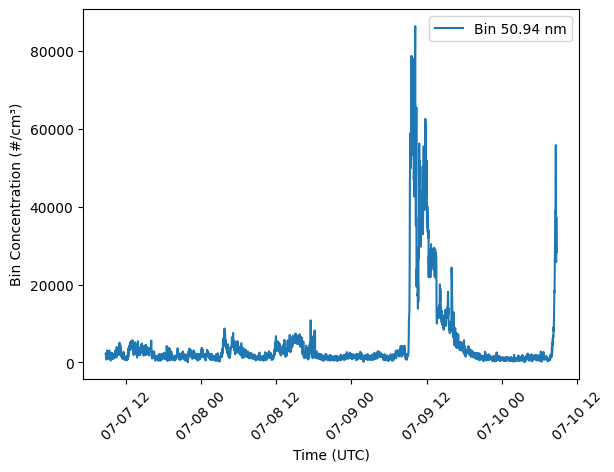

In [6]:
# Importing the necessary function for converting epoch time to datetime64
from particula.util.time_manage import datetime64_from_epoch_array

# Converting the epoch time to datetime64 format
time_in_datetime64 = datetime64_from_epoch_array(epoch_time)

# Creating a plot
fig, ax = plt.subplots()

# Plotting the data with time in datetime64 format on the x-axis
ax.plot(time_in_datetime64,
        data[:, 50],  # Selecting the 50th bin of data
        label=f'Bin {header[50]} nm',  # Label for the data series
        )

# Rotating the x-axis labels to 45 degrees for better readability
plt.xticks(rotation=45)

# Setting the x-axis and y-axis labels
ax.set_xlabel("Time (UTC)")  # Updated label to indicate the time format
ax.set_ylabel("Bin Concentration (#/cm³)")

# Adding a legend to the plot
ax.legend()

# Displaying the plot
plt.show()

# Adjusting the layout for a neat presentation
fig.tight_layout()

## Contour Plot of Data

Contour plots are a powerful tool for visualizing how data changes over time and space. In the context of size distribution data, a contour plot can effectively show the variation in particle concentration across different sizes over time. It's like looking at a topographic map where different colors or shades represent varying concentrations of particles at different sizes and times.

### Preparing the Data for Contour Plotting

Before we plot, it's a good practice to set limits on our data to ensure that extreme values don't skew the visualization. This helps in highlighting the relevant ranges of our data. Here's how we do it:

1. **Setting Lower and Upper Limits**: We impose a lower limit to avoid plotting extremely low concentrations (which might be less relevant or below detection limits) and an upper limit to avoid letting very high concentrations dominate the plot.

2. **Option for Logarithmic Scale**: For data with a wide range of values, using a logarithmic scale (e.g., `np.log10(concentration)`) can make the plot more informative by compressing the scale and emphasizing the variations across orders of magnitude.

### Creating the Contour Plot

With our data prepared, we can now create the contour plot. This type of plot will use different colors or shades to represent the concentration of particles at various sizes and times.

- **X-Axis (Epoch Time)**: Represents the time dimension of our data.
- **Y-Axis (Diameter in nm)**: Represents the different size bins of particles.
- **Color Intensity**: Indicates the concentration of particles at each size and time.

Using `plt.contourf`, we create a filled contour plot with a logarithmic y-scale, which is particularly useful for size distribution data that typically spans several orders of magnitude in particle sizes.


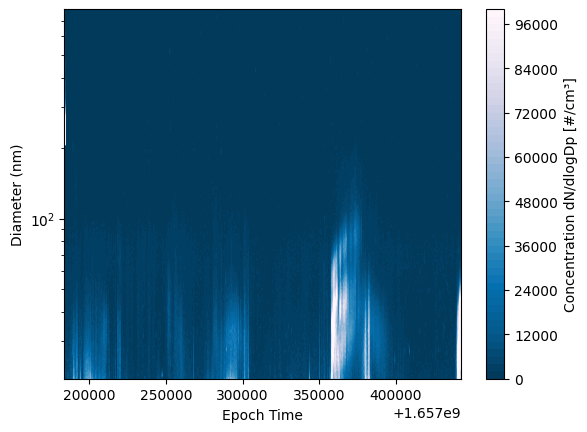

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Setting limits on the concentration data to improve plot readability
concentration = data
concentration = np.where(
    concentration < 1e-5,
    1e-5,
    concentration)  # Setting a lower limit
concentration = np.where(
    concentration > 10**5,
    10**5,
    concentration)  # Setting an upper limit
# Uncomment the next line to plot concentration in logarithmic scale
# concentration = np.log10(concentration)

# Creating a figure and axis for the contour plot
fig, ax = plt.subplots(1, 1)

# Creating the contour plot
plt.contourf(
    epoch_time,  # X-axis: Time data in epoch format
    # Y-axis: Particle sizes converted to float
    np.array(header).astype(float),
    concentration.T,  # Transposed concentration data for correct orientation
    cmap=plt.cm.PuBu_r,  # Color map for the plot
    levels=50  # Number of levels in the contour plot
)

# Setting the y-axis to logarithmic scale for better visualization of size
# distribution
plt.yscale('log')

# Setting labels for the x-axis and y-axis
ax.set_xlabel('Epoch Time')  # Label for the x-axis
ax.set_ylabel('Diameter (nm)')  # Label for the y-axis

# Adding a color bar to the plot, indicating concentration levels
plt.colorbar(label='Concentration dN/dlogDp [#/cm³]', ax=ax)

# Displaying the plot
plt.show()

# Adjusting the layout for a better presentation of the plot elements
fig.tight_layout()

## Simplifying Data Import with the Settings Generator

In the same way we handled 1-dimensional (1d) data, we can also streamline the import process for 2-dimensional (2d) data using the settings generator. This tool is particularly useful for creating a structured approach to loading complex datasets. By using the `settings_generator.for_general_sizer_1d_2d_load()` function, we can generate a comprehensive settings dictionary that directs how data should be imported and formatted.

### Understanding the Settings Generator Function

This function is designed to be flexible and accommodate a wide range of data types and formats. It comes with numerous arguments that allow you to specify details like data checks, column information, time format, etc., tailored to your specific dataset. However, it's important to note that you don't have to be overwhelmed by these options.

### Using Default Settings

For many users, especially those just starting out or working with standard data formats, the default settings of the `settings_generator` function may work. These defaults are configured to align with the example data provided in the Particula package. This means that if your data structure is similar to the example data, you can call this function without passing any arguments, and it will automatically set up the settings for you.

This approach not only saves time but also reduces the potential for errors in the data import process, making it a quick and reliable way to get your data ready for analysis.

In [8]:
# Importing the necessary module for settings generation
from particula.data import settings_generator

# Generating settings for loading 1d and 2d data from files
# This is useful for instruments that output both types of data in the
# same file

settings_1d, settings_2d = (
    LoaderSizerSettingsBuilder()
    .set_relative_data_folder('SMPS_data')
    .set_filename_regex('*.csv')
    .set_header_row(24)
    .set_data_checks(data_checks)
    .set_data_column([
        "Lower Size (nm)", "Upper Size (nm)", "Sample Temp (C)",
        "Sample Pressure (kPa)", "Relative Humidity (%)", "Median (nm)",
        "Mean (nm)", "Geo. Mean (nm)", "Mode (nm)", "Geo. Std. Dev.",
        "Total Conc. (#/cm³)"
    ])
    .set_data_header([
        "Lower_Size_(nm)", "Upper_Size_(nm)", "Sample_Temp_(C)",
        "Sample_Pressure_(kPa)", "Relative_Humidity_(%)", "Median_(nm)",
        "Mean_(nm)", "Geo_Mean_(nm)", "Mode_(nm)", "Geo_Std_Dev.",
        "Total_Conc_(#/cc)"
    ])
    .set_data_sizer_reader(data_sizer_reader)
    .set_time_column([1, 2])
    .set_time_format("%m/%d/%Y %H:%M:%S")
    .set_delimiter(",")
    .set_timezone_identifier("UTC")
    .build()
)

# Printing the generated settings dictionaries for both 1d and 2d data
print('Settings for 1d data:')
for key, value in settings_1d.items():
    print(f'{key}: {value}')

print('\nSettings for 2d data:')
for key, value in settings_2d.items():
    print(f'{key}: {value}')


Settings for 1d data:
relative_data_folder: SMPS_data
filename_regex: *.csv
MIN_SIZE_BYTES: 10000
data_loading_function: general_1d_load
header_row: 24
data_checks: {'characters': [250], 'char_counts': {'/': 2, ':': 2}, 'skip_rows': 25, 'skip_end': 0}
data_column: ['Lower Size (nm)', 'Upper Size (nm)', 'Sample Temp (C)', 'Sample Pressure (kPa)', 'Relative Humidity (%)', 'Median (nm)', 'Mean (nm)', 'Geo. Mean (nm)', 'Mode (nm)', 'Geo. Std. Dev.', 'Total Conc. (#/cm³)']
data_header: ['Lower_Size_(nm)', 'Upper_Size_(nm)', 'Sample_Temp_(C)', 'Sample_Pressure_(kPa)', 'Relative_Humidity_(%)', 'Median_(nm)', 'Mean_(nm)', 'Geo_Mean_(nm)', 'Mode_(nm)', 'Geo_Std_Dev.', 'Total_Conc_(#/cc)']
time_column: [1, 2]
time_format: %m/%d/%Y %H:%M:%S
delimiter: ,
time_shift_seconds: 0
timezone_identifier: UTC

Settings for 2d data:
relative_data_folder: SMPS_data
filename_regex: *.csv
MIN_SIZE_BYTES: 10000
data_loading_function: general_2d_load
header_row: 24
data_checks: {'characters': [250], 'char_counts

## Efficient Data Loading with the Interface

After configuring our settings dictionaries for 1-dimensional and 2-dimensional data, we're set to leverage the interface for data loading. This interface, a key component of the Particula package, streamlines the process, making it more efficient and straightforward, especially after you have a good grasp of how the settings work.

### Understanding the Interface's Role

The interface acts as a facilitator that intelligently uses the settings we've established to manage the data loading process. It eliminates the need for manual execution of multiple steps, thereby integrating and automating the data import based on our predefined preferences.

### The Advantages of Mastery

Once you're comfortable with setting up your data parameters, using the interface offers several key benefits:

- **Enhanced Efficiency**: It consolidates several operations into a single action, significantly speeding up the data loading process.
- **Consistent Results**: By automating the data import process with predefined settings, it ensures uniformity and accuracy across different datasets.
- **Optimized Workflow**: For users who understand the settings, the interface offers a simplified and more effective way to handle data loading. It removes the repetitive task of manually calling functions, allowing you to focus more on data analysis.

In the following section, we'll demonstrate how to utilize the interface with our prepared settings to efficiently load and process our data.

In [9]:
# Setting the working path to the directory where the data files are located
working_path = get_data_folder()

# Using the settings dictionaries created earlier for 1d and 2d data

# Loading 1-dimensional data using the loader interface
# The interface takes the path and settings for 1d data and loads the data
# accordingly
data_stream_1d = loader_interface.load_files_interface(
    path=working_path,  # The path where data files are stored
    settings=settings_1d,  # Settings dictionary for 1d data
)

# Loading 2-dimensional data using the loader interface
# Similar to the 1d data, but using the settings for 2d data
data_stream_2d = loader_interface.load_files_interface(
    path=working_path,  # The path where data files are stored
    settings=settings_2d,  # Settings dictionary for 2d data
)

# The data_stream_1d and data_stream_2d objects now contain the loaded data
# ready for further analysis and visualization

  Loading file: 2022-07-07_095151_SMPS.csv
  Loading file: 2022-07-10_094659_SMPS.csv
  Loading file: 2022-07-07_095151_SMPS.csv
  Loading file: 2022-07-10_094659_SMPS.csv


## Printing Data Stream Summaries

After loading our data using the loader interface, it's a good practice to take a moment and review what we have loaded. This helps us confirm that the data is imported correctly and gives us an initial overview of its structure. We'll do this by printing summaries of the `data_stream_1d` and `data_stream_2d` objects.

### Understanding the Data Stream Summary

When we print a `data_stream` object, it provides us with a summary of its contents. This includes information like the size of the data, the headers (which represent different data types or measurements), and a glimpse into the actual data values. These summaries are especially useful for:

- **Verifying Data Integrity**: Ensuring that the data has been loaded as expected and is ready for analysis.
- **Quick Overview**: Getting a high-level understanding of the data's structure, such as the number of data points and the range of measurements.

### Code for Printing Summaries

Here's how we print the summaries for our 1-dimensional and 2-dimensional data streams:

In [10]:
# Print a blank line for better readability
print('')

# Print the summary of the 1-dimensional data stream
print('Data stream 1d summary:')
print(data_stream_1d)  # This will display a summary of the 1d data

# Print another blank line for separation
print('')

# Print the summary of the 2-dimensional data stream
print('Data stream 2d summary:')
print(data_stream_2d)  # This will display a summary of the 2d data


Data stream 1d summary:
Stream(header=['Lower_Size_(nm)', 'Upper_Size_(nm)', 'Sample_Temp_(C)', 'Sample_Pressure_(kPa)', 'Relative_Humidity_(%)', 'Median_(nm)', 'Mean_(nm)', 'Geo_Mean_(nm)', 'Mode_(nm)', 'Geo_Std_Dev.', 'Total_Conc_(#/cc)'], data=array([[2.05000e+01, 7.91500e+02, 2.37000e+01, ..., 2.07210e+01,
        2.17900e+00, 2.16900e+03],
       [2.05000e+01, 7.91500e+02, 2.36000e+01, ..., 2.52550e+01,
        2.10100e+00, 2.39408e+03],
       [2.05000e+01, 7.91500e+02, 2.37000e+01, ..., 2.18700e+01,
        2.13600e+00, 2.27861e+03],
       ...,
       [2.05000e+01, 7.91500e+02, 2.35000e+01, ..., 2.07210e+01,
        2.31800e+00, 2.08056e+03],
       [2.05000e+01, 7.91500e+02, 2.33000e+01, ..., 2.10970e+01,
        2.31800e+00, 2.10616e+03],
       [2.05000e+01, 7.91500e+02, 2.35000e+01, ..., 2.07210e+01,
        2.24800e+00, 2.45781e+03]]), time=array([1.65718376e+09, 1.65718385e+09, 1.65718394e+09, ...,
       1.65753440e+09, 1.65753450e+09, 1.65753459e+09]), files=[['2022-07

## Plotting Again

Plotting is an integral part of the data analysis process. It transforms raw data into visual representations that can reveal insights, patterns, and anomalies that might not be immediately apparent in numerical form. Let's delve into why plotting is so crucial in understanding your data.

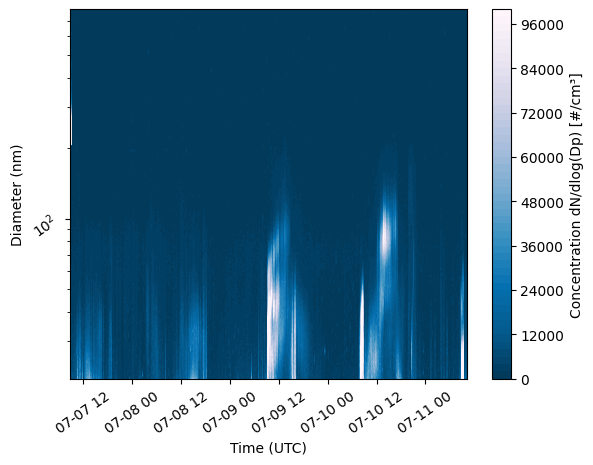

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Adjusting the concentration data for better visualization in the plot
concentration = data_stream_2d.data
concentration = np.where(
    concentration < 1e-5,
    1e-5,
    concentration)  # Setting a lower limit
concentration = np.where(
    concentration > 10**5,
    10**5,
    concentration)  # Setting an upper limit
# Uncomment the following line to plot the concentration on a logarithmic scale
# concentration = np.log10(concentration)

# Creating a figure and axis for the contour plot
fig, ax = plt.subplots(1, 1)

# Creating the contour plot
# X-axis: Time data in datetime64 format from data_stream_2d
# Y-axis: Particle sizes (diameter in nm) converted from the header strings to floats
# Z-axis: Concentration data
plt.contourf(
    data_stream_2d.datetime64,  # Time data
    data_stream_2d.header_float,  # Particle sizes
    concentration.T,  # Concentration data, transposed for correct orientation
    cmap=plt.cm.PuBu_r,  # Color map for the plot
    levels=50  # Number of contour levels
)

# Setting the y-axis to logarithmic scale for better visualization of size
# distribution
plt.yscale('log')

# Rotating the x-axis labels for better readability
plt.tick_params(rotation=35)

# Setting labels for the x-axis and y-axis
ax.set_xlabel("Time (UTC)")
ax.set_ylabel('Diameter (nm)')

# Adding a color bar to indicate concentration levels
plt.colorbar(label='Concentration dN/dlog(Dp) [#/cm³]', ax=ax)

# Displaying the plot
plt.show()

# Adjusting the layout to ensure all elements of the plot are clearly visible
fig.tight_layout()

## Summary of Loading Data Part 2

In this section, we delved into the process of loading and handling 2-dimensional data, focusing on a size distribution dataset. We walked through several crucial steps, providing a comprehensive guide to managing and visualizing complex data structures. Here's a recap of what we covered:

- Setting the Working Path: We began by establishing the working directory for our data, a foundational step in ensuring our scripts access the correct files.
- Loading the Data: Using the loader module, we demonstrated how to import raw data from a file, setting the stage for further processing.
- Formatting the Data: We then tackled the challenge of formatting 2-dimensional data, extracting size bins as headers, and preparing the dataset for analysis.
- Initial Plotting: To get a preliminary understanding of our data, we created initial plots. This step is crucial for visually inspecting the data and confirming its integrity.
- Generating the Settings Dictionary: We utilized the settings_generator to create settings dictionaries for both 1-dimensional and 2-dimensional data. This streamlines the data loading process, especially for complex datasets.
- Loading Data with the Interface: We showcased how to use the loader interface to efficiently load data using the predefined settings, emphasizing the ease and efficiency it brings to the data loading process.
- Advanced Plotting of the Data Stream: Lastly, we explored more advanced data visualization techniques, including creating contour plots. This allowed us to visualize how particle concentration varied across different sizes and times, offering valuable insights into our dataset.

Throughout this section, we focused on making each step clear and accessible, particularly for those new to working with 2-dimensional datasets in Python. By following these steps, you can effectively manage and analyze complex data, gaining deeper insights into your research or projects.